In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [0]:
x = pd.read_csv('X_opening.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis=1)

# **Metodos de evaluación**

---



**Random state en train_test_split**

In [0]:
# random_state controla la aleatoreidad por medio de una seed
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, random_state=1)

In [4]:
# ambos DataFrames son iguales pues usaron el mismo random_state
pd.DataFrame.equals(x_train, x2_train)

True

**Cross Validation**

In [0]:
from sklearn.model_selection import cross_val_score

In [6]:
# Score de cada valdacion con cada uno de los 5 folds
scores = cross_val_score(Lasso(), x, y, cv=5, scoring='r2')
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [7]:
scores.mean() # Final score

0.44964021745791766

# **Selección de modelos**

---



**Overfitting o underfitting**

In [0]:
from sklearn.model_selection import cross_validate

In [15]:
# Cross_validate devuelve mas datos que el cross_val_score por si mismo
results = cross_validate(Lasso(), x, y, cv=5, return_train_score=True)
results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


{'fit_time': array([0.00985575, 0.05707073, 0.04374957, 0.02784753, 0.02536631]),
 'score_time': array([0.00320435, 0.00252056, 0.00261712, 0.0028317 , 0.00280643]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [16]:
# Media de los errores de test y train
test_scores = results['test_score']
train_scores = results['train_score']

print(np.mean(test_scores))
print(np.mean(train_scores))

0.44964021745791766
0.7491178363039036


Valores muy diferentes y el de train no es tan bueno -> Buscar un mejor modelo

**Validation curves**

In [0]:
from sklearn.neighbors import KNeighborsRegressor # Modelo a probar

In [23]:
results = cross_validate(KNeighborsRegressor(), x, y, cv=5, return_train_score=True)

# Media de los errores de test y train
test_scores = results['test_score']
train_scores = results['train_score']

print(np.mean(test_scores))
print(np.mean(train_scores))

0.3161450871488181
0.7718842060773927


Valores parecidos a Lasso -> Probar con un numero diferente de n_neighbors

In [0]:
from sklearn.model_selection import validation_curve # Curvas de validacion

In [0]:
n = np.arange(2, 50, 2)

In [0]:
# Prueba para diferentes n_neighbors en el rango n y devuelve los scores de train y test
train_scores,test_scores = validation_curve(KNeighborsRegressor(), x, y, param_name='n_neighbors', param_range=n, cv=5)

In [35]:
np.mean(train_scores, axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

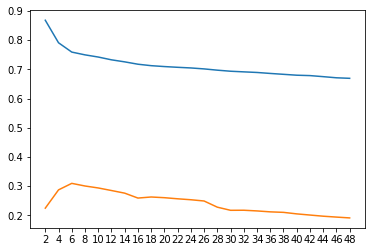

In [44]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(train_scores.shape[0]), n)
plt.show()

El pico de los scores de test esta en n_neighbors=6 -> Elegiremos ese valor para determinar nuestra situacion actual

**Learning curves**

In [0]:
from sklearn.model_selection import learning_curve

In [0]:
lc = learning_curve(KNeighborsRegressor(n_neighbors=6), x, y, cv=5)
samples, train, test = lc[0], lc[1], lc[2]

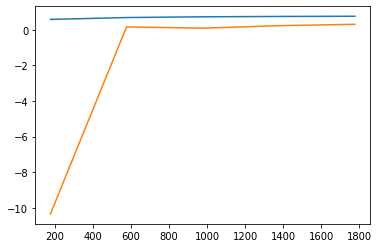

In [54]:
plt.plot(samples, np.mean(train, axis=1))
plt.plot(samples, np.mean(test, axis=1))
plt.show()

El primer valor es muy malo -> Lo eliminamos para "hacer zoom" en el resto de la grafica

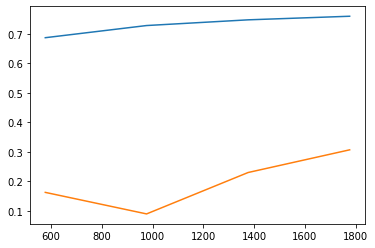

In [55]:
plt.plot(samples[1:], np.mean(train, axis=1)[1:])
plt.plot(samples[1:], np.mean(test, axis=1)[1:])
plt.show()

El modelo aun esta aprendiendo pues aun no llega a formar una asíntota con el score de train, pero no hay manera de obtener mas datos -> Buscar un nuevo modelo

# **¿Cómo solucionar el overfitting y el underfitting?**

---



Viarianza Alta:

- Conseguir más ejemplos
- Reducir cantidad de features
- Aumentar coeficiente de regularización

Bias Alto:

- Más features
- Modelo más complejo
- Mal resultado general:
- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidas por tu dataset